In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Imputations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Text file1 to dataframes

data=pd.read_csv("D:/DataSets/kaggle_visible_evaluation_triplets.txt", sep="\t", names=['user_id', 'song_id', 'freq'])
data

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [4]:
# Text file2 to dataframes

data1=pd.read_csv("D:/DataSets/unique_tracks.txt", sep="<SEP>", names=['track_id', 'song_id', 'artist_name', 'release'])
data1

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [5]:
# Checking for NULL values

print(sum(data.isnull().any()), sum(data1.isnull().any()))

0 1


In [6]:
# Checking for duplicated values for first dataframe


duplicated=data.duplicated()
sum(duplicated)

0

In [7]:
# Checking for duplicated values for second dataframe

duplicated=data1.duplicated()
sum(duplicated)

0

In [8]:
# Checking for duplicated values for song_id

duplicated=data1["song_id"].duplicated()
sum(duplicated)

944

In [9]:
# merging Two dataframes

data2=pd.merge(data,data1)
data2

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
...,...,...,...,...,...,...
1491947,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,TRZHWHD128F42B9D11,Our Broken Garden,The Blinding
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,TRNBQWA128F145DB74,Emilio,Como A Nadie
1491949,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,TRIWGAI12903CDF710,Morbid Angel,Victorious March Of Reign The Conqueror
1491950,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,TRMPODL128F4228DE1,Gus Gus,Call of the Wild


# Identification of variables and data types

In [10]:
# Viewing Columns 

data2.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [11]:
# Viewing shape 

data2.shape

(1491952, 6)

In [12]:
# Viewing datatype of each column 

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491952 entries, 0 to 1491951
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1491952 non-null  object
 1   song_id      1491952 non-null  object
 2   freq         1491952 non-null  int64 
 3   track_id     1491952 non-null  object
 4   artist_name  1491952 non-null  object
 5   release      1491951 non-null  object
dtypes: int64(1), object(5)
memory usage: 79.7+ MB


# Analyzing the basic metrics

In [13]:
print("Total number of records=", data2.shape[0])

Total number of records= 1491952


In [14]:
print("Total number of users=", data2["user_id"].unique().shape[0])

Total number of users= 110000


In [15]:
print("Total number of songs=", data2["song_id"].unique().shape[0])

Total number of songs= 163206


In [16]:
print("Unique Artists=", data2["artist_name"].unique().shape[0])

Unique Artists= 28367


In [17]:
print("Unique releases=", data2["release"].unique().shape[0])

Unique releases= 137675


# Non-Graphical Univariate Analysis

In [18]:
# Top 5 most listened songs



song_grouped = data2.groupby(['song_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song_id'], ascending = [0,1]).head()

,song_id,freq,percentage
38185,SOFRQTD12A81C233C0,5043,0.338014
5478,SOAUWYT12A81C206F1,4483,0.300479
10546,SOBONKR12A58A7A7E0,4136,0.277221
140446,SOWCKVR12A8C142411,3822,0.256174
6096,SOAXGDH12A8C13F8A1,3780,0.253359


In [19]:
# 5 least listened songs



song_grouped = data2.groupby(['song_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song_id'], ascending = [0,1]).tail()

,song_id,freq,percentage
163191,SOZZYCA12AB0182579,1,0.000067
163199,SOZZZFM12AC4687A9E,1,0.000067
163200,SOZZZFW12AB0187AD1,1,0.000067
163202,SOZZZKJ12A6D4FBF66,1,0.000067
163204,SOZZZRV12A8C1361F1,1,0.000067


In [20]:
# Top 5 Users who listened to most songs



song_grouped = data2.groupby(['user_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'user_id'], ascending = [0,1]).head()

,user_id,freq,percentage
21323,316110734d8da7478cc33237458814f770a9eb7a,57,0.003820
74342,ad4b2717e89766b66b96fe52a38736116e315874,57,0.003820
21676,3233c598c50f0ddbd351504e773cd51de79691db,55,0.003686
90678,d30e18323f15426c3cdc8585252ed34459916f51,55,0.003686
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,54,0.003619


In [21]:
# 5 Users who listened to least songs



song_grouped = data2.groupby(['user_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'user_id'], ascending = [0,1]).tail()

,user_id,freq,percentage
109942,ffe3151c73f3b4d472f8dcef97051b97a37dd098,5,0.000335
109950,ffe6adab8edbd3f53230e34379b063419396e319,5,0.000335
109974,ffefe5cc52de004e20121395da5113ab2e502555,5,0.000335
109981,fff2649ed1dcb2f6d8b45081fa1ab16d9e79c1ed,5,0.000335
109988,fff7d30a45a17d26768d020b75818008a741ef2c,5,0.000335


In [22]:
# Top 5 Artists users listen to the most

artist=pd.DataFrame(data2["artist_name"].value_counts())
artist.columns=["Count"]
artist.head()

,Count
Coldplay,13675
Kings Of Leon,11586
Justin Bieber,9259
Florence + The Machine,8213
Eminem,8160


In [23]:
# 5 Artists users listen the least

artist=pd.DataFrame(data2["artist_name"].value_counts())
artist.columns=["Count"]
artist.tail()

,Count
Jan Garbarek_ Rainer BrÃ¼ninghaus_ Eberhard Weber_ Marilyn Mazur_ Manu KatchÃ©,1
Goasia,1
Some Velvet Morning,1
Z.Z. Hill,1
Kutt Calhoun; DJ Chill; Krizz Kaliko,1


In [24]:
# Top 5 relases users listen to the most

artist=pd.DataFrame(data2["release"].value_counts())
artist.columns=["Count"]
artist.head()

,Count
Sehr kosmisch,5043
Undo,4483
You're The One,4270
Use Somebody,3822
Dog Days Are Over (Radio Edit),3780


In [25]:
# 5 relases users listen the least

artist=pd.DataFrame(data2["release"].value_counts())
artist.columns=["Count"]
artist.tail()

,Count
John_ I'm Only Dancing,1
Titan,1
Secular Songs,1
Multikillionaire,1
A Message To Rudy,1


In [26]:
artist_name = data2.groupby('artist_name')['freq'].count()
artist_name.head()

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
Name: freq, dtype: int64

In [27]:
artist_name = pd.DataFrame(artist_name)

In [28]:
artist_name.head(20)

,freq
artist_name,
!!!,109
!Deladap,3
& And Oceans,2
'68 Comeback,22
'N Sync/Phil Collins,48
'Til Tuesday,27
't Hof Van Commerce,16
't Hof Van Commerce & Brahim,2
(Hed) Planet Earth,3


In [29]:
artist_name.sort_values(by='freq').tail(20)

,freq
artist_name,
Harmonia,5046
Guns N' Roses,5061
BjÃ¶rk,5144
Evanescence,5170
Daft Punk,5411
John Mayer,5452
The Killers,5721
Radiohead,5764
Linkin Park,5846


In [30]:
artist_and_songs = data2.groupby('artist_name')['release']
artist_and_songs.head(10)

0             You're The One
1             You're The One
2             You're The One
3             You're The One
4             You're The One
                 ...        
1491931       Lungo la Senna
1491932      Popcorn Slavery
1491934              Zukunft
1491935    And The Beat Goes
1491937          Straight Up
Name: release, Length: 171964, dtype: object

In [31]:
artist_and_songs.describe()

,count,unique,top,freq
artist_name,,,,
!!!,109,10,Sweet Life,46
!Deladap,3,2,Goldregen (N.O.H.A. Mix),2
& And Oceans,2,2,Odious And Devious,1
'68 Comeback,22,20,The Way I Walk,2
'N Sync/Phil Collins,48,1,Trashin' The Camp (Phil And 'N Sync Version),48
...,...,...,...,...
Ã‰rika Machado,2,2,Sei LÃ¡,1
Ã‰tienne Daho,45,16,Le Premier Jour (Du Reste De Ta Vie) (Remix 05),12
Ã�gata,1,1,Conselho de mÃ£e,1


In [32]:
artist_and_songs = pd.DataFrame(artist_and_songs)

In [33]:
artist_and_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28367 entries, 0 to 28366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       28367 non-null  object
 1   1       28367 non-null  object
dtypes: object(2)
memory usage: 443.4+ KB


In [34]:
from scipy import stats

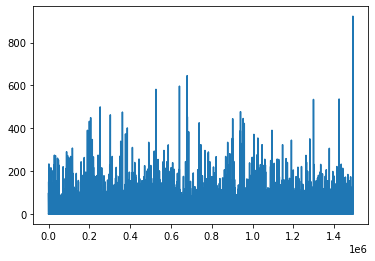

In [35]:
plt.plot(data2.freq)

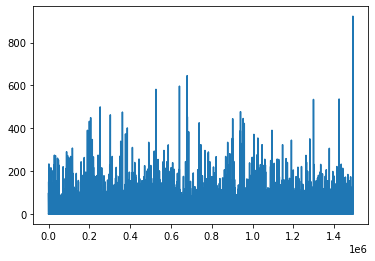

In [36]:
x = np.arange(0,data2['freq'].shape[0])
p = data2.freq
plt.plot(x, p)
plt.show()

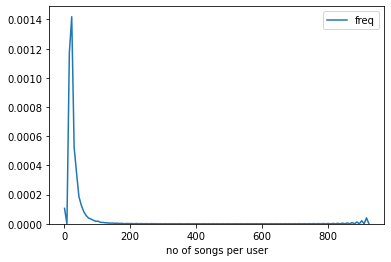

In [37]:
plt.xlabel('no of songs per user')
sns.kdeplot(data2.freq)
plt.show()

(array([1.490834e+06, 9.260000e+02, 1.410000e+02, 2.700000e+01,
        1.400000e+01, 6.000000e+00, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  1. ,  93.2, 185.4, 277.6, 369.8, 462. , 554.2, 646.4, 738.6,
        830.8, 923. ]),
 <a list of 10 Patch objects>)

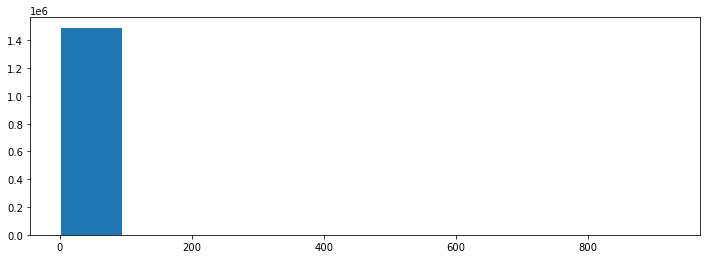

In [38]:
fig, ax = plt.subplots(figsize=(12,4))
plt.hist(data2.freq)

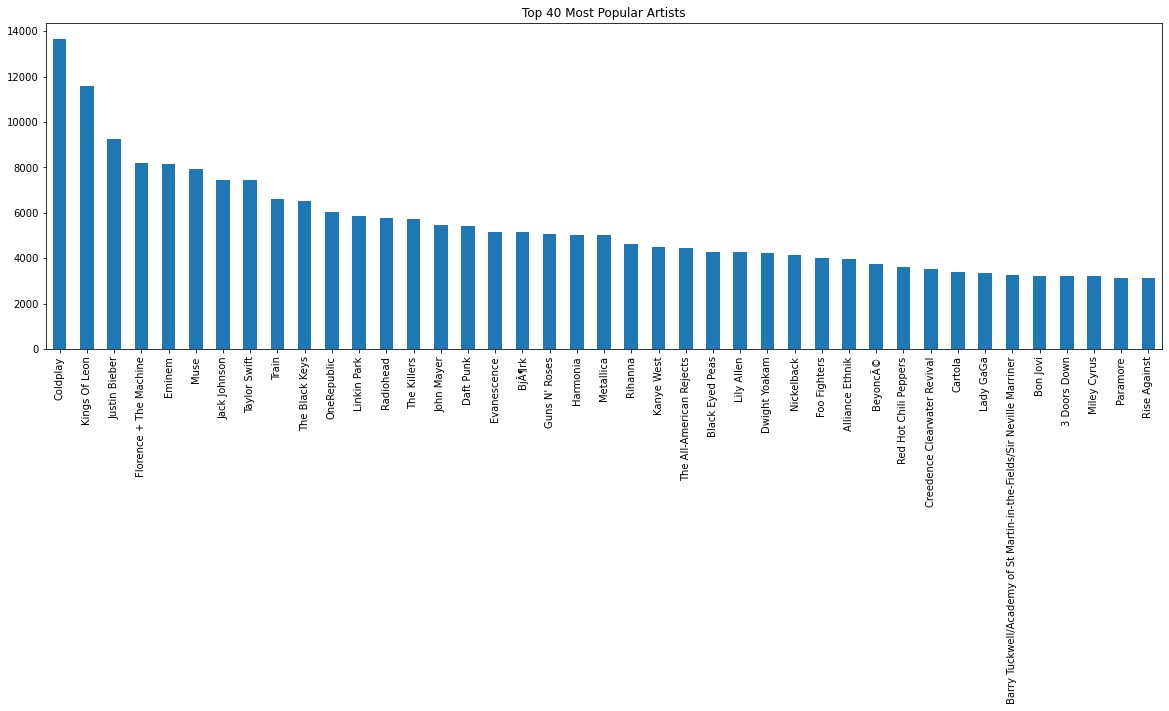

In [39]:
# Creates a plot of most popular artists.
def PlotmostPopularArtists():
    plt.close("all")
    plt.figure(figsize=(20,6))
    data2['artist_name'].value_counts()[0:41].plot(kind='bar', title="Top 40 Most Popular Artists")
    plt.show()
PlotmostPopularArtists()

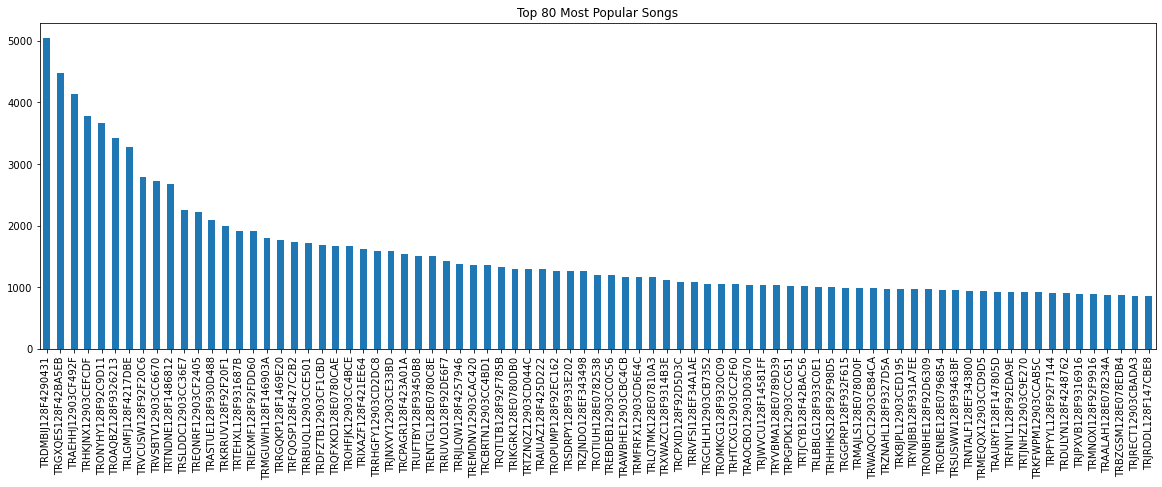

In [40]:
# Creates a plot of most popular track.
def PlotmostPopularTracks():
    plt.close("all")
    plt.figure(figsize=(20,6))
    data2['track_id'].value_counts()[0:81].plot(kind='bar', title="Top 80 Most Popular Songs")
    plt.show()
PlotmostPopularTracks()    

In [41]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [51]:
song_df = data2.head(40000)

# popularity based recommendation

In [52]:
pr =popularity_recommender_py()


In [53]:
pr.create(song_df, 'user_id', 'release')

In [54]:
pr.recommend(song_df['user_id'][5])

,user_id,release,score,Rank
66,f6e34f0a68d5ea1344511e33486f956de361db78,Sehr kosmisch,5043,1.0
82,f6e34f0a68d5ea1344511e33486f956de361db78,Undo,4483,2.0
89,f6e34f0a68d5ea1344511e33486f956de361db78,You're The One,4136,3.0
19,f6e34f0a68d5ea1344511e33486f956de361db78,Dog Days Are Over (Radio Edit),3780,4.0
65,f6e34f0a68d5ea1344511e33486f956de361db78,Secrets,3430,5.0
31,f6e34f0a68d5ea1344511e33486f956de361db78,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,6.0
79,f6e34f0a68d5ea1344511e33486f956de361db78,Tive Sim,2668,7.0
10,f6e34f0a68d5ea1344511e33486f956de361db78,Catch You Baby (Steve Pitron & Max Sanna Radio...,2097,8.0
2,f6e34f0a68d5ea1344511e33486f956de361db78,Ain't Misbehavin,1712,9.0
15,f6e34f0a68d5ea1344511e33486f956de361db78,Creep (Explicit),1202,10.0


In [55]:
pr.recommend(song_df['user_id'][100])

,user_id,release,score,Rank
66,9b7110c3dad9114427df053a60b7d989c0b8ebae,Sehr kosmisch,5043,1.0
82,9b7110c3dad9114427df053a60b7d989c0b8ebae,Undo,4483,2.0
89,9b7110c3dad9114427df053a60b7d989c0b8ebae,You're The One,4136,3.0
19,9b7110c3dad9114427df053a60b7d989c0b8ebae,Dog Days Are Over (Radio Edit),3780,4.0
65,9b7110c3dad9114427df053a60b7d989c0b8ebae,Secrets,3430,5.0
31,9b7110c3dad9114427df053a60b7d989c0b8ebae,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,6.0
79,9b7110c3dad9114427df053a60b7d989c0b8ebae,Tive Sim,2668,7.0
10,9b7110c3dad9114427df053a60b7d989c0b8ebae,Catch You Baby (Steve Pitron & Max Sanna Radio...,2097,8.0
2,9b7110c3dad9114427df053a60b7d989c0b8ebae,Ain't Misbehavin,1712,9.0
15,9b7110c3dad9114427df053a60b7d989c0b8ebae,Creep (Explicit),1202,10.0


# Content Based filtering 

In [56]:
ir = item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'release')

In [57]:
user_items = ir.get_user_items(song_df['user_id'][5])

In [58]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One


In [59]:
# give song recommendation for that user
ir.recommend(song_df['user_id'][5])

No. of unique songs for the user: 1
no. of unique songs in the training set: 92
Non zero values in cooccurence_matrix :58


,user_id,song,score,rank
0,f6e34f0a68d5ea1344511e33486f956de361db78,Undo,0.151965,1
1,f6e34f0a68d5ea1344511e33486f956de361db78,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.097319,2
2,f6e34f0a68d5ea1344511e33486f956de361db78,Ain't Misbehavin,0.085980,3
3,f6e34f0a68d5ea1344511e33486f956de361db78,Tive Sim,0.074033,4
4,f6e34f0a68d5ea1344511e33486f956de361db78,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.058774,5
5,f6e34f0a68d5ea1344511e33486f956de361db78,Sehr kosmisch,0.056029,6
6,f6e34f0a68d5ea1344511e33486f956de361db78,Secrets,0.055525,7
7,f6e34f0a68d5ea1344511e33486f956de361db78,Dog Days Are Over (Radio Edit),0.052940,8
8,f6e34f0a68d5ea1344511e33486f956de361db78,Unite (2009 Digital Remaster),0.025821,9
9,f6e34f0a68d5ea1344511e33486f956de361db78,Creep (Explicit),0.013288,10


In [61]:

# give related songs based on the words
ir.get_similar_items(['Undo', "You're The One"])

no. of unique songs in the training set: 92
Non zero values in cooccurence_matrix :116


,user_id,song,score,rank
0,,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.099519,1
1,,Ain't Misbehavin,0.083566,2
2,,Tive Sim,0.074201,3
3,,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.059263,4
4,,Sehr kosmisch,0.059006,5
5,,Secrets,0.055859,6
6,,Dog Days Are Over (Radio Edit),0.051772,7
7,,Unite (2009 Digital Remaster),0.024268,8
8,,In The End (Album Version),0.012267,9
9,,Creep (Explicit),0.011080,10


# Collaborative filtering 

In [63]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)
    
    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended 
    
    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)
    
    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations
                 
    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}
    
    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]

In [65]:
song_user = song_df.groupby('user_id')['song_id'].count()

In [71]:
song_ten_id = song_user[song_user > 10].index.to_list()

In [72]:
df_song_id_more_ten = song_df[song_df['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [73]:
from scipy.sparse import csr_matrix
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='freq').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [74]:
df_songs_features.head()

user_id,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,9be82340a8b5ef32357fe5af957ccd54736ece95,d7083f5e1d50c264277d624340edaaf3dc16095b
song_id,,,
SOACRJG12A8C137A8D,0.0,0.0,1.0
SOATCSU12A8C13393A,0.0,0.0,1.0
SOAYGQW12AB017D6FA,1.0,0.0,0.0
SOCOXGP12A81C21F2F,0.0,1.0,0.0
SODSKZZ12AB0188524,0.0,0.0,1.0


In [76]:
df_unique_songs = song_df.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'release']]

In [78]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].release))
}

In [79]:
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [84]:
from fuzzywuzzy import fuzz
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for You're The One ...
... Done


In [85]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for You're The One are:
['You Already Know What You Are', 'I Swear This Time I Mean It (Album Version)', 'mirrors [Beau Burchell Mix]', 'The Downfall Of Us All', 'Stay Awake (Dreams Only Last For A Night)', 'The Silence (Album Version)', 'Dear Maria_ Count Me In', 'Sound The Alarm', 'A Party Song (The Walk of Shame)', 'Your Song']
